Consider the following badly written recursive program to compute the Fibonnacci numbers:
```
def f(n):
    if n <= 1:
        return n
    else:
        return f(n-1) + f(n-2)
```

(a) Analyze its run time.

(b) Write a iterative program to do the same thing, starting with f(0), etc.

## Analyze its run time

Notice that from this recursion,
the time to compute `f(n)` is the time to compute `f(n-1)` plus the time to compute `f(n-2)`,
so if `t(n)` is the time to compute `f(n)`,
then
```
  t(n) = t(n-1) + t(n-2) ,
```
i.e., `t(n)` is a Fibonnacci number.
Oh, except not quite: notice that
- `t(0)` and `t(1)` might not be equal to 1 as in the Fibonnacci case
- `f(n)` also does an addition.

But, roughly, it seems like the runtime should grow like the Fibonnacci numbers,
i.e., like
$$ \left(\frac{1 + \sqrt{5}}{2}\right)^n . $$

## More carefully:

The function does two things (mostly): calls functions, and adds numbers.
How many *additions* does `f(n)` do?

First, let's ask python.

In [24]:
def f(n):
    if n <= 1:
        return n
    else:
        # want to insert something here which adds 1 to a global counter
        return f(n-1) + f(n-2)

def t(n):
    # we'll define the global counter within another function
    # to keep things tidy
    data = dict()  # a dictionary
    data['num_additions'] = 0
    def f(n):
        if n <= 1:
            return n
        else:
            data['num_additions'] += 1
            return f(n-1) + f(n-2)
    return f(n), data

for n in range(5):
    a = f(n)
    b, _ = t(n)
    assert a == b

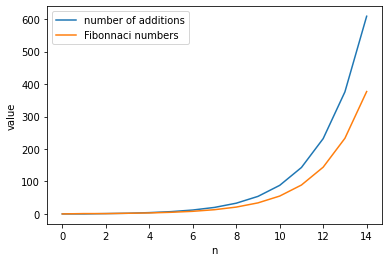

In [17]:
import numpy as np
import matplotlib.pyplot as plt

nvals = np.arange(15)
results = [t(n) for n in nvals]
tvals = [x[1]["num_additions"] for x in results]
yvals = [x[0] for x in results]

fig, ax = plt.subplots()
ax.plot(nvals, tvals, label="number of additions")
ax.plot(nvals, yvals, label="Fibonnaci numbers")
ax.set_xlabel("n")
ax.set_ylabel("value")
ax.legend();

The number of additions *actually* satisfies
$$
   a(n) = a(n-1) + a(n-2) + 1
   \qquad \text{for } n \ge 2
$$
with $a(0) = a(1) = 0$.
Let's do this with generating functions:
$$
  F(x) = \sum_{n \ge 0} x^n a(n),
$$
and so summing over $n \ge 2$ we have
$$\begin{aligned}
  F(x) 
  &= \sum_{n \ge 2} \left( x x^{n-1} a(n-1) + x^2 x^{n-2} a(n-2) + x^n \right) \\
  &=
      x F(x) + x^2 F(x) + \frac{x}{1-x}
\end{aligned}$$
and so
$$
   F(x) = \frac{ x }{ (1-x) (1 - x - x^2) } .
$$
Next we could find the power series of $F$ with partial frrrrrrrrrrrrractions.